### Рабочая тетрадь №3.
#### Симакин Сергей Евгеньевич
```
    Классификация — один из разделов машинного обучения,
посвященный решению следующей задачи. Имеется множество объектов
(ситуаций), разделённых некоторым образом на классы. Задано конечное
множество объектов, для которых известно, к каким классам они относятся.
    Это множество называется обучающей выборкой. Классовая
принадлежность остальных объектов не известна. Требуется построить
алгоритм, способный классифицировать произвольный объект из исходного
множества.
    Классифицировать объект — значит, указать номер (или
наименование класса), к которому относится данный объект.
Классификация объекта — номер или наименование класса,
выдаваемый алгоритмом классификации в результате его применения к
данному конкретному объекту.
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Теоретический материал – Функции Python
```
Перед тем как рассматривать задачи классификации вспомним
понятие функции (метода) в Python. Функция в python - объект,
принимающий аргументы и возвращающий значение. Обычно функция
определяется с помощью инструкции `def`.
Определим простейшую функцию:
def add(x, y):
 return x + y
Инструкция return говорит, что нужно вернуть значение. В нашем
случае функция возвращает сумму x и y. Теперь мы ее можем вызвать:
add(1, 10)
add('abc', 'def')
'abcdef'
Функция может быть любой сложности и возвращать любые объекты
(списки, кортежи, и даже функции):
def newfunc(n):
 def myfunc(x):
  return x + n
 return myfunc
new = newfunc(100) # new - это функция
new(200)
300
Функция может и не заканчиваться инструкцией return, при этом
функция вернет значение None:
def func():
 pass
print(func())
None
Функция может принимать произвольное количество аргументов или
не принимать их вовсе. Также распространены функции с произвольным
числом аргументов, функции с позиционными и именованными
аргументами, обязательными и необязательными.
def func(*args):
 return args
func(1, 2, 3, 'abc')
(1, 2, 3, 'abc')
func()
()
func(1)
(1,)
Как видно из примера, args - это кортеж из всех переданных
аргументов функции, и с переменной можно работать также, как и с
кортежем.
Функция может принимать и произвольное число именованных
аргументов, тогда перед именем ставится **:
def func(**kwargs):
 return kwargs
func(a=1, b=2, c=3)
{'a': 1, 'c': 3, 'b': 2}
func()
{}
func(a='python')
{'a': 'python'}
```

#### **Пример 1.**
Напишите функцию sum_range(start, end), которая суммирует все целые
числа от значения «start» до величины «end» включительно.
Если пользователь задаст первое число большее чем второе, просто
поменяйте их местами.

In [ ]:
def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))

display(sum_range(2, 12))
display(sum_range(-4, 4))
display(sum_range(3, 2))

77

0

5

#### **Пример 2.**
Напишите рекурсивную функцию вычисления факториала на языке Python.

In [ ]:
def fact(num):
    if num == 0:
        return 1
    else:
        return num * fact(num - 1)
    
display(fact(5))

120

### Теоретический материал – Расстояние между объектами класса
```
Сходство или различие между объектами классификации
устанавливается в зависимости от выбранного метрического расстояния
между ними. Если каждый объект описывается n свойствами (признаками),
то он может быть представлен как точка в n-мерном пространстве, и
сходство с другими объектами будет определяться как соответствующее
расстояние. При классификации используются различные меры расстояния
между объектами.
```
1. Евклидово расстояние
```
Это, пожалуй, наиболее часто используемая мера расстояния. Она
является геометрическим расстоянием в многомерном пространстве и
вычисляется следующим образом:
```
$$P = \sqrt{\sum_{i=1}^{N}(A_i - B_i)^2}$$
```
• 𝑃 – расстояние между объектами A и B;
• 𝐴𝑖 – значение i-свойства объекта A;
• 𝐵𝑖 – значение i-свойства объекта B.
```
2. Квадрат евклидова расстояния
```
Данная мера расстояния используется в тех случаях, когда требуется
придать больше значение более отдаленным друг от друга объектам. Это
расстояние вычисляется следующим образом:
```
$$P = \sum_{i=1}^{N}(A_i - B_i)^2$$

3. Взвешенное евклидово расстояние
```
Применяется в тех случаях, когда каждому i-свойству удается приписать
некоторый «вес» wi, пропорционально степени важности признака в задаче
классификации:
```
$$P = \sqrt{\sum_{i=1}^{N}w_i(A_i - B_i)^2}$$

4. Хеммингово расстояние
```
Также называется манхэттенским, сити-блок расстоянием или расстоянием
городских кварталов. Это расстояние является разностью по координатам.
Хеммингово расстояние вычисляется по формуле:
```
$$P = \sum_{i=1}^{N}|A_i - B_i|$$
5. Расстояние Чебышева
```
Принимает значение наибольшего модуля разности между значениями
соответствующих свойств (признаков) объектов:
```
$$P = max|A_i - B_i|$$
```
Выбор меры расстояния и весов для классифицирующих свойств –
очень важный этап, так как от этих процедур зависят состав и количество
формируемых классов, а также степень сходства объектов внутри классов.
```

#### **Пример 3.**
Напишите функции в Python, которая вычисляет Евклидово расстояние
между двумя массивами NumPy.

In [ ]:
import numpy as np

def euclidean_distance(v1, v2):
    return sum((v1 - v2)**2)**0.5

x = np.array([0,0,0])
y = np.array([3,3,3])
euclidean_distance(x,y)

5.196152422706632

#### **Пример 4.**
Напишите 4 функции в Python, которые рассчитывают квадрат Евклидова
расстояния, взвешенное евклидово расстояние, Хеммингово расстояние и
расстояние Чебышева между двумя массивами NumPy.

In [ ]:
def sqr_euclidean_distance(v1, v2):
    return sum((v1 - v2)**2)

def weighted_euclidean_distance(v1, v2, w):
    return sum(s*((x - y)**2) for x,y,s in zip(v1,v2,w))**0.5

def manhattan_distance(v1, v2):
    return sum(abs(v1 - v2))

def chebyshev_distance(v1, v2):
    return max(abs(v1 - v2))

x = np.array([0,0,0])
y = np.array([3,3,3])
w = np.array([0,0,1])

display(sqr_euclidean_distance(x,y))
display(weighted_euclidean_distance(x,y,w))
display(manhattan_distance(x,y))
display(chebyshev_distance(x,y))

27

3.0

9

3

#### **Пример 5.**
В Python есть встроенные функции для вычисления расстояний между
векторами. Мы будем использовать NumPy для расчета расстояния для
двух точек, поскольку ранее рассмотренные структуры данных могут быть
переведены в Numpy массив с помошью специальных функциий.
Например, для серий это будет выглядеть следующим образом:
seriesName.to_numpy().
Для удобства визуализации и анализа результатов в дальнейших расчетах
будм использовать 2 точки в 3-х мерном пространстве:

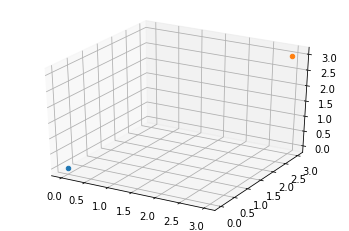

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(0,0,0)
ax.scatter(3,3,3)
plt.show()

#### **Пример 6.**
Рассчитать расстояния между двумя точками с использованием методов
определения расстояний, представленных выше.
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [ ]:
x = np.array([0,0,0])
y = np.array([3,3,3])

display(np.linalg.norm(x-y, ord=2)) # Евклид
display(np.linalg.norm(x-y, ord=2)**2) # Квадрат Евклида
display(np.linalg.norm(x-y, ord=1)) # Хемминг
display(np.linalg.norm(x-y, ord=np.inf)) # Чебышев

5.196152422706632

27.0

9.0

3.0

#### **Задание 1.**
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

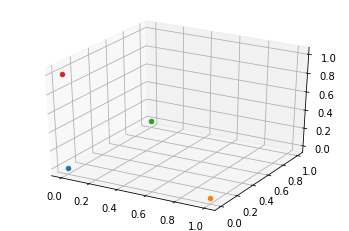

1.0

1.0

1.0

1.4142135623730951

1.4142135623730951

1.4142135623730951

1.0

1.0

1.0

2.0000000000000004

2.0000000000000004

2.0000000000000004

1.0

1.0

1.0

2.0

2.0

2.0

1.0

1.0

1.0

1.0

1.0

1.0

In [ ]:
x1 = np.array([0,0,0])
x2 = np.array([1,0,0])
x3 = np.array([0,1,0])
x4 = np.array([0,0,1])

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(0,0,0)
ax.scatter(1,0,0)
ax.scatter(0,1,0)
ax.scatter(0,0,1)
plt.show()

display(np.linalg.norm(x1-x2, ord=2))
display(np.linalg.norm(x1-x3, ord=2))
display(np.linalg.norm(x1-x4, ord=2))
display(np.linalg.norm(x2-x3, ord=2))
display(np.linalg.norm(x2-x4, ord=2))
display(np.linalg.norm(x3-x4, ord=2))

display(np.linalg.norm(x1-x2, ord=2)**2)
display(np.linalg.norm(x1-x3, ord=2)**2)
display(np.linalg.norm(x1-x4, ord=2)**2)
display(np.linalg.norm(x2-x3, ord=2)**2)
display(np.linalg.norm(x2-x4, ord=2)**2)
display(np.linalg.norm(x3-x4, ord=2)**2)

display(np.linalg.norm(x1-x2, ord=1))
display(np.linalg.norm(x1-x3, ord=1))
display(np.linalg.norm(x1-x4, ord=1))
display(np.linalg.norm(x2-x3, ord=1))
display(np.linalg.norm(x2-x4, ord=1))
display(np.linalg.norm(x3-x4, ord=1))

display(np.linalg.norm(x1-x2, ord=np.inf))
display(np.linalg.norm(x1-x3, ord=np.inf))
display(np.linalg.norm(x1-x4, ord=np.inf))
display(np.linalg.norm(x2-x3, ord=np.inf))
display(np.linalg.norm(x2-x4, ord=np.inf))
display(np.linalg.norm(x3-x4, ord=np.inf))


### Теоретический материал – Задачи классификации.
```
Метод k-ближайших соседей используется для решения задачи
классификации. Он относит объекты к классу, которому принадлежит
большинство из k его ближайших соседей в многомерном пространстве
признаков. Это один из простейших алгоритмов обучения
классификационных моделей. Число k – это количество соседних объектов
в пространстве признаков, которые сравниваются с классифицируемым
объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-
ю соседями. В процессе обучения алгоритм просто запоминает все векторы
признаков и соответствующие им метки классов. При работе с реальными
данными, т.е. наблюдениями, метки класса которых неизвестны,
вычисляется расстояние между вектором нового наблюдения и ранее
запомненными. Затем выбирается k ближайших к нему векторов, и новый
объект относится к классу, которому принадлежит большинство из них.
Приведем алгоритм метода.
1. Выберите значение K соседей (скажем, k = 5)
2. Найдите ближайшую точку данных K (5) для нашей новой точки
данных на основе евклидова расстояния (которое мы обсудим позже)
3. Среди этих K точек данных подсчитайте точки данных в каждой
категории.
4. Назначьте новую точку данных категории, которая имеет наибольшее
количество соседей с новой точкой данных

Модуль библиотеки sklearn - sklearn.neighbors предоставляет
функциональные возможности для контролируемого обучения на основе
соседей. Обучение на основе контролируемых соседей бывает двух видов:
классификация данных с дискретными метками и регрессия для данных с
непрерывными метками. В данном разделе рассмотрим несколько примеров
с использованием названного метода.
```

#### **Пример 7.**
В примере показано создание 2d-массива со значениями x и y. Список
target содержит возможные выходные классы (часто называемые
метками). Далее происходит обучение классификатора k-ближайших
соседей по исходным данным. Далее производится прогноз
принадлежности к классам для двух точек данных.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[-1,1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
target = np.array([0,0,0,1,1,1])

K = 3
model = KNeighborsClassifier(K)
model.fit(X, target)
display(model)

print('(-2,-2) is a class', model.predict(np.array([[-2,-2]])))
print('(1,3) is a class', model.predict(np.array([[1,3]])))

KNeighborsClassifier(n_neighbors=3)

(-2,-2) is a class [0]
(1,3) is a class [1]


#### **Пример 8.**
Далее приведем более наглядный пример. Будет построена граница
решения для каждого класса. В качестве данных будем использовать уже
знакомый нам и встроенный в библиотеку sklearn набор данных ирисов
Фишера. Этот набор данных стал уже классическим, и часто используется
в литературе для иллюстрации работы различных статистических
алгоритмов. Датасет содержит наблюдения за 150 разными цветками
ирисов, данные по каждому цветку расположены в строках. В стобцах
записаны длина и ширина чашелистика, длина и ширина лепестка, вид
ириса.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
display(iris.species.unique())
display(iris)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### **Пример 9.**
Покажем на графиках зависимости ширины лепестка от его длины, а также
аналогичный график зависимость для длины и ширины чашелистика.
Разные виды цветков отмечены разными цветами.

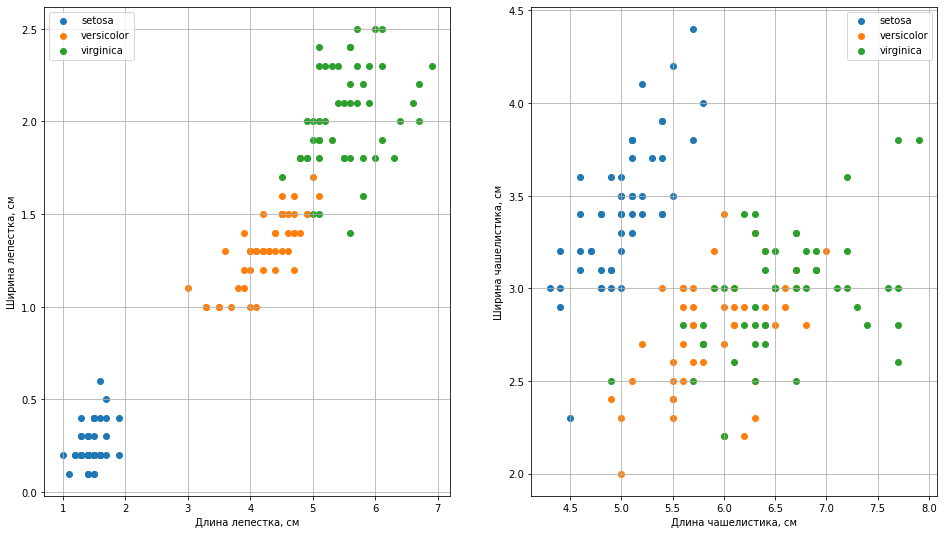

In [ ]:
fig = plt.figure(figsize = (16, 9))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(iris[iris['species'] == 'setosa'].petal_length, iris[iris['species'] == 'setosa'].petal_width, label = 'setosa')
ax1.scatter(iris[iris['species'] == 'versicolor'].petal_length, iris[iris['species'] == 'versicolor'].petal_width, label = 'versicolor')
ax1.scatter(iris[iris['species'] == 'virginica'].petal_length, iris[iris['species'] == 'virginica'].petal_width, label = 'virginica')
ax1.set_xlabel('Длина лепестка, см')
ax1.set_ylabel('Ширина лепестка, см')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(iris[iris['species'] == 'setosa'].sepal_length, iris[iris['species'] == 'setosa'].sepal_width, label = 'setosa')
ax2.scatter(iris[iris['species'] == 'versicolor'].sepal_length, iris[iris['species'] == 'versicolor'].sepal_width, label = 'versicolor')
ax2.scatter(iris[iris['species'] == 'virginica'].sepal_length, iris[iris['species'] == 'virginica'].sepal_width, label = 'virginica')
ax2.set_xlabel('Длина чашелистика, см')
ax2.set_ylabel('Ширина чашелистика, см')
ax2.legend()
ax2.grid()

#### **Пример 10.**
Из графиков видно, что в первом случае классы визуально хорошо
отделимы друг от друга, хотя два классе имеют небольшое пересечение.
Во втором случае разделить два класса между собой уже намного труднее.
Далее разделим датасет на обучающую и тестовую выборки в
соотношении 80:20. Обучающая выборка (training sample) — выборка, по
которой производится настройка (оптимизация параметров) модели
зависимости. Тестовая (или контрольная) выборка (test sample) —
выборка, по которой оценивается качество построенной модели.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 0.9666666666666667


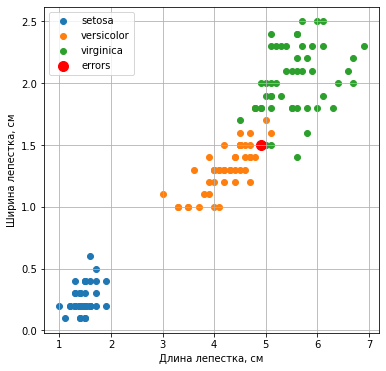

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
                                        iris.iloc[:, :-1],
                                        iris.iloc[:, [-1]],
                                        test_size = 0.2
                                    )

model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
y_predicted = pd.DataFrame(model.predict(X_test), columns=['species'])
y_test.reset_index(drop = True, inplace= True)
X_test.reset_index(drop = True, inplace = True)

X_errors = X_test[y_predicted['species'] != y_test['species']]

fig = plt.figure(figsize = (6, 6))

ax1 = fig.add_subplot(1,1,1)
ax1.scatter(iris[iris['species'] == 'setosa'].petal_length, iris[iris['species'] == 'setosa'].petal_width, label = 'setosa')
ax1.scatter(iris[iris['species'] == 'versicolor'].petal_length, iris[iris['species'] == 'versicolor'].petal_width, label = 'versicolor')
ax1.scatter(iris[iris['species'] == 'virginica'].petal_length, iris[iris['species'] == 'virginica'].petal_width, label = 'virginica')
ax1.scatter(X_errors.iloc[:, 2], X_errors.iloc[:, 3], c = 'r', label = 'errors', s=100)
ax1.set_xlabel('Длина лепестка, см')
ax1.set_ylabel('Ширина лепестка, см')
ax1.legend()
ax1.grid()

print('Accuracy =', accuracy_score(y_test, y_predicted))


#### **Задание 2.**
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты. Выведите матрицу ошибок, обоснуйте значение точности.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 0.9666666666666667


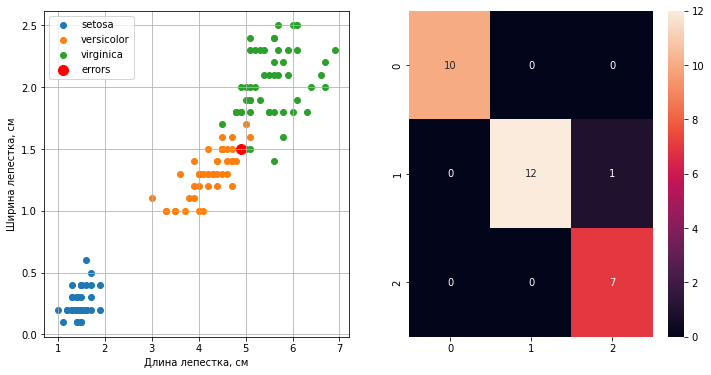

In [ ]:
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(1)
model.fit(X_train, y_train)
y_predicted = pd.DataFrame(model.predict(X_test), columns=['species'])
y_test.reset_index(drop = True, inplace= True)
X_test.reset_index(drop = True, inplace = True)

X_errors = X_test[y_predicted['species'] != y_test['species']]

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(iris[iris['species'] == 'setosa'].petal_length, iris[iris['species'] == 'setosa'].petal_width, label = 'setosa')
ax1.scatter(iris[iris['species'] == 'versicolor'].petal_length, iris[iris['species'] == 'versicolor'].petal_width, label = 'versicolor')
ax1.scatter(iris[iris['species'] == 'virginica'].petal_length, iris[iris['species'] == 'virginica'].petal_width, label = 'virginica')
ax1.scatter(X_errors.iloc[:, 2], X_errors.iloc[:, 3], c = 'r', label = 'errors', s=100)
ax1.set_xlabel('Длина лепестка, см')
ax1.set_ylabel('Ширина лепестка, см')
ax1.legend()
ax1.grid()

print('Accuracy =', accuracy_score(y_test, y_predicted))

ax2 = fig.add_subplot(1,2,2)
conf_m = confusion_matrix(y_test, y_predicted)
heat_map = sns.heatmap(conf_m, annot = True)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 0.9666666666666667


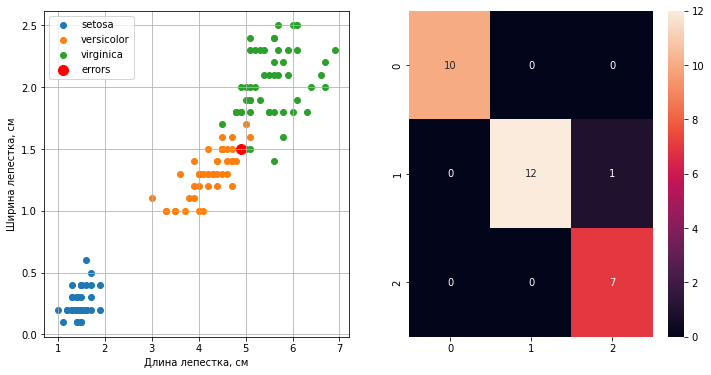

In [ ]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
y_predicted = pd.DataFrame(model.predict(X_test), columns=['species'])
y_test.reset_index(drop = True, inplace= True)
X_test.reset_index(drop = True, inplace = True)

X_errors = X_test[y_predicted['species'] != y_test['species']]

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(iris[iris['species'] == 'setosa'].petal_length, iris[iris['species'] == 'setosa'].petal_width, label = 'setosa')
ax1.scatter(iris[iris['species'] == 'versicolor'].petal_length, iris[iris['species'] == 'versicolor'].petal_width, label = 'versicolor')
ax1.scatter(iris[iris['species'] == 'virginica'].petal_length, iris[iris['species'] == 'virginica'].petal_width, label = 'virginica')
ax1.scatter(X_errors.iloc[:, 2], X_errors.iloc[:, 3], c = 'r', label = 'errors', s=100)
ax1.set_xlabel('Длина лепестка, см')
ax1.set_ylabel('Ширина лепестка, см')
ax1.legend()
ax1.grid()

print('Accuracy =', accuracy_score(y_test, y_predicted))

ax2 = fig.add_subplot(1,2,2)
conf_m = confusion_matrix(y_test, y_predicted)
heat_map = sns.heatmap(conf_m, annot = True)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 1.0


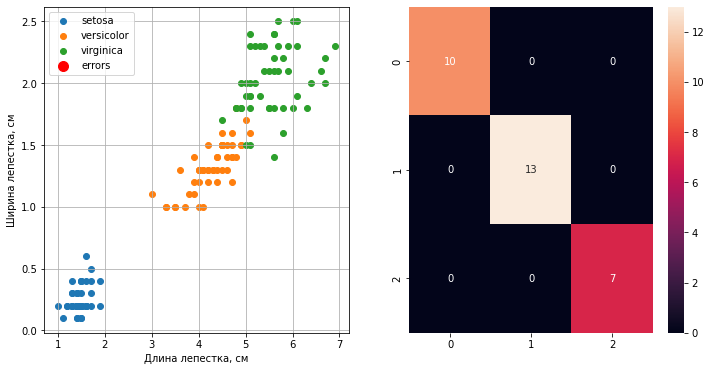

In [ ]:
model = KNeighborsClassifier(10)
model.fit(X_train, y_train)
y_predicted = pd.DataFrame(model.predict(X_test), columns=['species'])
y_test.reset_index(drop = True, inplace= True)
X_test.reset_index(drop = True, inplace = True)

X_errors = X_test[y_predicted['species'] != y_test['species']]

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(iris[iris['species'] == 'setosa'].petal_length, iris[iris['species'] == 'setosa'].petal_width, label = 'setosa')
ax1.scatter(iris[iris['species'] == 'versicolor'].petal_length, iris[iris['species'] == 'versicolor'].petal_width, label = 'versicolor')
ax1.scatter(iris[iris['species'] == 'virginica'].petal_length, iris[iris['species'] == 'virginica'].petal_width, label = 'virginica')
ax1.scatter(X_errors.iloc[:, 2], X_errors.iloc[:, 3], c = 'r', label = 'errors', s=100)
ax1.set_xlabel('Длина лепестка, см')
ax1.set_ylabel('Ширина лепестка, см')
ax1.legend()
ax1.grid()

print('Accuracy =', accuracy_score(y_test, y_predicted))

ax2 = fig.add_subplot(1,2,2)
conf_m = confusion_matrix(y_test, y_predicted)
heat_map = sns.heatmap(conf_m, annot = True)

### Теоретический материал – Работа с категориальными данными
```
Часто бывает полезно разбивать объекты на категории не по
количеству, а по качеству. Эта качественная информация нередко
представляется как принадлежность наблюдения к отдельной категории,
такой как пол, цвета или марка автомобиля. Однако не все категориальные
данные одинаковые. Наборы категорий без внутреннего упорядочения
называются номинальными. Примеры номинальных категорий включают:
• синий, красный, зеленый;
• мужчина, женщина;
• банан, клубника, яблоко.
С другой стороны, когда набор категорий имеет некое естественное
упорядочение, мы называем его порядковым. Например:
• низкий, средний, высокий;
• молодые, старые;
• согласен, нейтрален, не согласен.
Более того, категориальная информация часто представлена в данных
в виде вектора или столбца символьных значений (например, "Москва",
"Санкт-Петербург", "Казань"). Проблема в том, что большинство машиннообучающихся алгоритмов требуют ввода числовых значений.
Алгоритм k ближайших соседей предоставляет простой пример.
Одним из шагов в алгоритме является вычисление расстояний между
наблюдениями — часто с использованием евклидова расстояния. Однако
вычисление расстояния, очевидно, невозможно, если значение х, является
строковым типом (например, "Москва"). Для того чтобы его можно было
ввести в уравнение евклидова расстояния, нам нужно преобразовать это
строковое значение в числовой формат. Наша цель — сделать
преобразование, которое правильно передает информацию в категориях
(упорядоченность, относительные интервалы между категориями и т. д.).
Существует большое количество методов кодирования категориальных
данных, среди которых нет универсальных. Выбирая метод, стоит
отталкиваться от ваших данных, мощности множества категорий и
алгоритма машинного обучения.
Далее рассмотрим некоторые методы таких преобразований.
```

#### **Пример 11.**
Дан порядковый категориальный признак (например, высокий, средний,
низкий). Выполнить его кодировку.
Для решения задачи можно использовать метод replace фрейма данных
pandas для преобразования строковых меток в числовые эквиваленты

In [ ]:
df = pd.DataFrame({'оценка': ['низкая', 'низкая', 'средняя', 'средняя', 'высокая']})
scale_mapper = {'низкая':1, 'средняя':2, 'высокая':3}
df['оценка'].replace(scale_mapper, inplace = True)
df

,оценка
0,1
1,1
2,2
3,2
4,3


#### **Пример 12.**
Дан словарь, и требуется его конвертировать в матрицу признаков.
Для решения задачи можно задействовать класс-векторизатор словаря
Dictvectorizer.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'красный':2, 'синий':4},
             {'красный':4, 'синий':3},
             {'красный':1, 'желтый':2},
             {'красный':2, 'желтый':2}]

dict_vectorizer = DictVectorizer(sparse = False)
features = dict_vectorizer.fit_transform(data_dict)
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

#### **Пример 13.**
Создать датафрейм, описывающий объект исследования человек набором
признаком. Произвести предобработку данных. Произвести нормировку
данных в диапазон от 0 до 1. Перевести категориальные данные в
числовые.

In [ ]:
from sklearn import preprocessing

df = pd.DataFrame({\
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],\
    'возраст': [45, 26, 41, 21],\
    'пол': ['муж', 'муж', 'жен', 'жен'],\
    'доход': [100000, 80000, 150000, 60000],\
    'цвет глаз': ['зеленый', 'серый', 'голубой', 'карий'],\
    'город рождения': ['Москва', 'Томск', 'Тула', 'Сочи'],\
    'город работы': ['Тула', 'Томск', 'Тула', 'Москва']},\
    index = [0, 1, 2, 3])
display(df)

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
df[['возраст', 'доход']] = min_max_scaler.fit_transform(df[['возраст', 'доход']])

sex_code = {'муж':1, 'жен':0}
eyes_code = {'зеленый':0, 'серый':1, 'голубой':2, 'карий':3}
df['пол'].replace(sex_code, inplace = True)
df['цвет глаз'].replace(eyes_code, inplace = True)
df = pd.get_dummies(df, columns=['город рождения'])
df = pd.get_dummies(df, columns=['город работы'])
display(df)

,имя,возраст,пол,доход,цвет глаз,город рождения,город работы
0,Петя,45,муж,100000,зеленый,Москва,Тула
1,Вася,26,муж,80000,серый,Томск,Томск
2,Аня,41,жен,150000,голубой,Тула,Тула
3,Света,21,жен,60000,карий,Сочи,Москва


,имя,возраст,пол,доход,цвет глаз,город рождения_Москва,город рождения_Сочи,город рождения_Томск,город рождения_Тула,город работы_Москва,город работы_Томск,город работы_Тула
0,Петя,1.000000,1,0.444444,0,1,0,0,0,0,0,1
1,Вася,0.208333,1,0.222222,1,0,0,1,0,0,1,0
2,Аня,0.833333,0,1.000000,2,0,0,0,1,0,0,1
3,Света,0.000000,0,0.000000,3,0,1,0,0,1,0,0


#### **Задание 3.**
Создать свой пример датафрейма, описывающий объект исследования
человек набором признаком. Произвести предобработку данных.
Произвести нормировку данных в диапазон от 0 до 1. Перевести
категориальные данные в числовые. Если есть идеи, предложите свои
варианты обработки данных.

In [ ]:
from sklearn import preprocessing

name = ['Петя', 'Вася', 'Аня', 'Света']
age = [45, 26, 41, 21]
sex = ['муж', 'муж', 'жен', 'жен']
salary = [100000, 80000, 150000, 60000]
eyes_color = ['зеленый', 'серый', 'голубой', 'карий']
city_of_birth = ['Москва', 'Томск', 'Тула', 'Сочи']
city_of_work = ['Тула', 'Томск', 'Тула', 'Москва']
columns = ['Имя', 'Возраст', 'Пол', 'Заработная плата', 'Цвет глаз', 'Город рождения', 'Город работы']
zip_data = list(zip(name, age, sex, salary, eyes_color, city_of_birth, city_of_work))

df = pd.DataFrame(zip_data, columns=columns)
display(df)

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
df[['Возраст', 'Заработная плата']] = min_max_scaler.fit_transform(df[['Возраст', 'Заработная плата']])

sex_code = {'муж':1, 'жен':0}
df['Пол'].replace(sex_code, inplace = True)
df['Цвет глаз'].replace(eyes_code, inplace = True)
df = pd.get_dummies(df, columns=['Город рождения', 'Город работы', 'Цвет глаз'])
display(df)

,Имя,Возраст,Пол,Заработная плата,Цвет глаз,Город рождения,Город работы
0,Петя,45,муж,100000,зеленый,Москва,Тула
1,Вася,26,муж,80000,серый,Томск,Томск
2,Аня,41,жен,150000,голубой,Тула,Тула
3,Света,21,жен,60000,карий,Сочи,Москва


,Имя,Возраст,Пол,Заработная плата,Город рождения_Москва,Город рождения_Сочи,Город рождения_Томск,Город рождения_Тула,Город работы_Москва,Город работы_Томск,Город работы_Тула,Цвет глаз_0,Цвет глаз_1,Цвет глаз_2,Цвет глаз_3
0,Петя,1.000000,1,0.444444,1,0,0,0,0,0,1,1,0,0,0
1,Вася,0.208333,1,0.222222,0,0,1,0,0,1,0,0,1,0,0
2,Аня,0.833333,0,1.000000,0,0,0,1,0,0,1,0,0,1,0
3,Света,0.000000,0,0.000000,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
zip_data

[('Петя', 45, 'муж', 100000, 'зеленый', 'Москва', 'Тула'),
 ('Вася', 26, 'муж', 80000, 'серый', 'Томск', 'Томск'),
 ('Аня', 41, 'жен', 150000, 'голубой', 'Тула', 'Тула'),
 ('Света', 21, 'жен', 60000, 'карий', 'Сочи', 'Москва')]

#### **Задание 4.**
Загрузите предложенный учебный датасет (dataset = pd.read_csv('Dataset
Knn.csv') или создайте свой, описывающий прикладную задачу
классификации. Выполните обработку данных, нормализацию и перевод
категориальных признаков в числовые. Реализуйте метод К-ближайших
соседей. С оценкой точности и выводом матрицы ошибок.

In [ ]:
path = '/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./3/Dataset Knn.csv'
data = pd.read_csv(path)
display(data)

sex_codes = {'М':1, 'Ж':0}
data['Пол'].replace(sex_codes, inplace = True)
data[['Возраст', 'Заработная плата']] = min_max_scaler.fit_transform(data[['Возраст', 'Заработная плата']])
data.drop(columns=['ID'], inplace = True)
display(data)

,ID,Пол,Возраст,Заработная плата,Покупка
0,1,М,19,19000,0
1,2,М,35,20000,0
2,3,Ж,26,43000,0
3,4,Ж,27,57000,0
4,5,М,19,76000,0
...,...,...,...,...,...
395,396,Ж,46,41000,1
396,397,М,51,23000,1
397,398,Ж,50,20000,1
398,399,М,36,33000,0


,Пол,Возраст,Заработная плата,Покупка
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0
...,...,...,...,...
395,0,0.666667,0.192593,1
396,1,0.785714,0.059259,1
397,0,0.761905,0.037037,1
398,1,0.428571,0.133333,0


Text(0.5, 1.0, 'Гистограмма корреляции признаков')

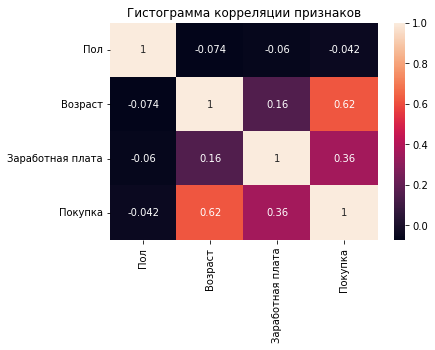

In [ ]:
heatmap = sns.heatmap(data.corr(), annot = True)
heatmap.set_title('Гистограмма корреляции признаков')

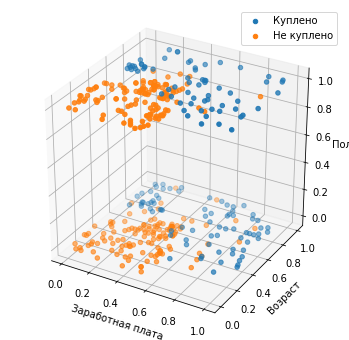

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.scatter(data.loc[data['Покупка'] == 1, ['Заработная плата']], data.loc[data['Покупка'] == 1, ['Возраст']], data.loc[data['Покупка'] == 1, ['Пол']], label = 'Куплено')
ax.scatter(data.loc[data['Покупка'] == 0, ['Заработная плата']], data.loc[data['Покупка'] == 0, ['Возраст']], data.loc[data['Покупка'] == 0, ['Пол']], label = 'Не куплено')
ax.set_xlabel('Заработная плата')
ax.set_ylabel('Возраст')
ax.set_zlabel('Пол')
ax.legend()

In [ ]:
model = KNeighborsClassifier(5)
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['Заработная плата', 'Возраст']], data.iloc[:, -1])
model.fit(X_train, y_train)

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


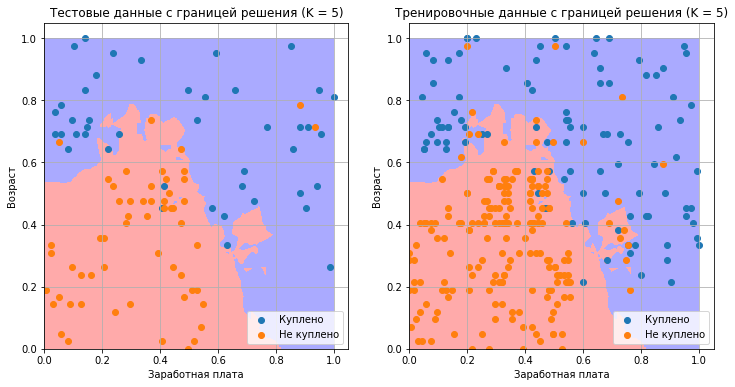

In [ ]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
xx, yy = np.meshgrid(np.arange(0, 1, 0.003), np.arange(0, 1, 0.003))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax1.scatter(X_test.loc[data['Покупка'] == 1, ['Заработная плата']], X_test.loc[data['Покупка'] == 1, ['Возраст']], label = 'Куплено')
ax1.scatter(X_test.loc[data['Покупка'] == 0, ['Заработная плата']], X_test.loc[data['Покупка'] == 0, ['Возраст']], label = 'Не куплено')
ax1.set_xlabel('Заработная плата')
ax1.set_ylabel('Возраст')
ax1.set_title('Тестовые данные с границей решения (K = 5)')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax2.scatter(X_train.loc[data['Покупка'] == 1, ['Заработная плата']], X_train.loc[data['Покупка'] == 1, ['Возраст']], label = 'Куплено')
ax2.scatter(X_train.loc[data['Покупка'] == 0, ['Заработная плата']], X_train.loc[data['Покупка'] == 0, ['Возраст']], label = 'Не куплено')
ax2.set_xlabel('Заработная плата')
ax2.set_ylabel('Возраст')
ax2.set_title('Тренировочные данные с границей решения (K = 5)')
ax2.legend()
ax2.grid()

0.93

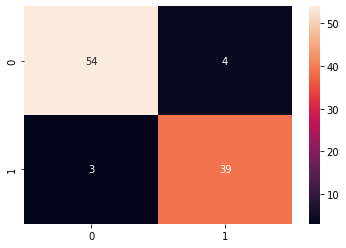

In [ ]:
y_pred = model.predict(X_test)
conf_m = confusion_matrix(y_pred, y_test)
headmap = sns.heatmap(conf_m, annot=True)
accuracy = accuracy_score(y_pred, y_test)
display(heatmap)
display(accuracy)